# Homework 6

### Marking Rubric (which may award partial credit) 

- [0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
- [0.2 points]: Evaluation of correctness and clarity in written communication for Question "3"
- [0.2 points]: Evaluation of correctness and clarity in written communication for Question "4"
- [0.2 points]: Evaluation of submitted work and conclusions for Question "9"
- [0.3 points]: Evaluation of written communication of the "big picture" differences and correct evidence assessement for Question "11"

### q.1
Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, (working with a ChatBot if needed) create python code explicitly demonstrating your explanation using numpy and scipy.stats

$$ 
\Large
\begin{align}
Y_i = {}& \beta_0 + \beta_1 x_i + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma^2\right)\\
Y_i \sim {}& \mathcal N\left( \beta_0 + \beta_1 x_i, \sigma^2\right)
\end{align}
$$

- Y is the outcome and x is the predictor varible both from observations of i, $\beta_0$ is the y intercept, $\beta_1$ is the slope of the line and $\epsilon$ is the error of i which is the deviation of $Y_i$ from the predicted value

- It discribes the relationship between a predictor varible which is $x_i$ and a continuours outcome varible $\Y_i$ with a linear equation. $\Y_i$ is the sum of the deterministic part $\beta_0$ + $\beta_i$x and a normal random variable $\epsilon$, the result is also normally distributed (this is a result of properties of the normal distribution). For each $\x_i$ , the error $\epsilon$ shifts $\Y_i$ slightly above or below $\beta_0$ + $\beta_i$x, resulting in a small deviation fo $\Y_i$ values around the line. Because $\epsilon$ is normally distributed, adding it to $\beta_0$ + $\beta_i$x makes each $\Y_i$ normally distributed with mean $\beta_0$ + $\beta_i$x and variance 


In [18]:
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go

# Parameters for the Simple Linear Regression model
n = 100                   # Number of observations
beta0 = 2                 # Intercept
beta1 = 1.5               # Slope
sigma = 0.5               # Standard deviation of error terms

# Generate predictor variable x uniformly between 0 and 10
x = np.linspace(0, 10, n)

# Generate error terms from a normal distribution with mean 0 and standard deviation sigma
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Compute outcomes Y using the Simple Linear Regression equation
Y = beta0 + beta1 * x + errors

# Visualization of the data points and the theoretical regression line
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data Points'))

# Add the theoretical regression line without noise
Y_line = beta0 + beta1 * x
fig.add_trace(go.Scatter(x=x, y=Y_line, mode='lines', name='Theoretical Line'))

# Configure plot layout
fig.update_layout(
    title='Simple Linear Regression Model: Y = β0 + β1 * x + ε',
    xaxis_title='x (Predictor)',
    yaxis_title='Y (Outcome)',
    showlegend=True
)

fig.show()


Certainly! Here’s a summary of our conversation:

We discussed the theoretical Simple Linear Regression model, which describes a linear relationship between a predictor variable \( x \) and an outcome variable \( Y \). The model consists of an intercept \( \beta_0 \), a slope \( \beta_1 \), and an error term \( \epsilon \) that follows a normal distribution. The model equation is:

\[
Y_i = \beta_0 + \beta_1 x_i + \epsilon_i
\]

Each outcome \( Y_i \) is normally distributed around the line defined by \( \beta_0 + \beta_1 x_i \), with the distribution’s variability determined by the error term’s standard deviation \( \sigma \). This results in observed data points \( Y_i \) forming a normal distribution around the line, given the fixed values of \( x \).

I also provided Python code to demonstrate this by generating predictor values, error terms, and the corresponding \( Y \) values, and then plotting the theoretical line alongside the scattered \( Y \) values. This visualization illustrates how the observed \( Y_i \) values are distributed around the linear trend line due to the added normal noise.

Would you like further help or clarification on any part of this?

link: https://chatgpt.com/share/672aa57c-66f4-8013-85d0-72da67d70fa9

### Q.2 
Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

In [19]:
import statsmodels.formula.api as smf  # what is this library for?
# to access the statsmodels formula api, and renaming it as smf for easier use. 
# it lets us specify and fit statistical models using a formula-based syntax to make a OLS regression
import plotly.express as px  # this is a ploting library
import pandas as pd
df = pd.DataFrame({'x': x, 'Y': Y})
# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 
# they specify the model (Y~x indicates that Y is predicted by x) and then fit it to the data

# what do each of the following provide?
fitted_model.summary()  # simple explanation? 
# summary table with details like R-squared, coefficients, standard errors, 
# and p-values for testing hypotheses about each coefficient
fitted_model.summary().tables[1]  # simple explanation?
# only shows regression coefficients 
fitted_model.params  # simple explanation?
# shows the intercept and slope
fitted_model.params.values  # simple explanation?
# numerical values of these coefficients.
fitted_model.rsquared  # simple explanation? R-squared value

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend -> creates a column to be used as a legend entry in the plot.
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x') # Creates a scatter plot with a regression trendline.

# This is essentially what above `trendline='ols'` does 
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")
# Adds the fitted regression line as a separate trace to emphasize the trendline on the plot.

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Q3.
Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation


In [20]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.formula.api as smf

# Parameters for the Simple Linear Regression model
n = 100                   # Number of observations
beta0 = 2                 # Intercept
beta1 = 1.5               # Slope
sigma = 0.5               # Standard deviation of error terms

# Generate predictor variable x uniformly between 0 and 10
x = np.linspace(0, 10, n)

# Generate error terms from a normal distribution with mean 0 and standard deviation sigma
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Compute outcomes Y using the Simple Linear Regression equation
Y = beta0 + beta1 * x + errors

# Create a DataFrame from x and Y
df = pd.DataFrame({'x': x, 'Y': Y})

# Visualization of the data points and the theoretical regression line
fig = go.Figure()

# Add data points to the figure
fig.add_trace(go.Scatter(x=df['x'], y=df['Y'], mode='markers', name='Data Points'))

# Add the theoretical regression line without noise
Y_line = beta0 + beta1 * x
fig.add_trace(go.Scatter(x=x, y=Y_line, mode='lines', name='Theoretical Line'))

# Fit an OLS model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Add the OLS trendline from statsmodels to the figure
fig.add_trace(go.Scatter(x=df['x'], y=fitted_model.fittedvalues,
                         line=dict(color='blue'), name="OLS Trendline"))

# Add the theoretical line again with a different style to contrast
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=f'Theoretical Line: {beta0} + {beta1} * x', 
                line=dict(dash='dot', color='orange'))

# Display the plot
fig.show()


The two lines demonstrates how random sampling variation affects the results of regression analysis. The theoretical line could be the "true" line that shows the "true" correlation of x and Y, while the OLS trendline is the line we would get from "real world" data as it has errors that have variances. 

while we can estimate relationships, each sample we draw from a population introduces some variation. Over repeated samples, the OLS line should converge around the true theoretical line, showcasing the consistency of OLS estimators in approximating true model parameters.

Here's a summary of the conversation:

1. **Objective**: You wanted to overlay and compare two regression lines—one from a theoretical model with simulated data and the other from a fitted OLS model based on that simulated data.

2. **Code Clarification**:
   - I provided code to define a DataFrame (`df`) from the simulated `x` and `Y` values to use with `statsmodels` for the OLS model.
   - The updated code visualizes both:
      - The **theoretical line** (based on model parameters `beta0` and `beta1`).
      - The **fitted OLS trendline** (using `statsmodels` to fit `Y ~ x` on the observed data).

3. **Concept Explanation**:
   - The **theoretical line** represents the "true" underlying relationship, without noise.
   - The **fitted OLS line** approximates this true line based on the noisy data, showing sampling variability’s effect on estimates.

4. **Purpose of Comparison**: By comparing the lines, you can visualize how random sampling variation affects regression estimates. Repeated simulations would show that, while each fitted OLS line varies due to sampling error, they tend to approximate the true theoretical line on average, illustrating the **consistency of OLS estimators**.

link: https://chatgpt.com/share/672ad026-4edc-8013-a23d-ce4d199aeede

### Q4. 
Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The fitted_model.fittedvalues in simple linear regression represent the predicted values of the outcome variable for each observation, based on the estimated relationship between the predictor and outcome variables. These values are derived from the estimated coefficients (intercept and slope), which is given by fitted_model.params provides $\beta_0$ which is the intercept and $\beta_1$ which is the slope that are calculated with the sample data. And then the fitted_model.fittedvalues are then calculated as  $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$. that can be checked with fitted_model.summary().tables[1]. 

These fitted values are "in-sample predictions," meaning they are based on the same data used to fit the model and are not forecasts for future outcomes. The process uses Ordinary Least Squares (OLS) to minimize the sum of squared residuals (differences between observed and predicted values), ensuring the best fit. The fitted values help evaluate the model’s accuracy and the relationship between the variables.

Here's a summary of our conversation:

We discussed how the in-sample predictions (fitted values) in a Simple Linear Regression model are derived using `fitted_model.params`. 

1. **Theoretical vs. Fitted Model**: The theoretical model \( Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \) represents the true relationship, while the fitted model \( \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \) uses estimated coefficients from the sample data.

2. **Estimated Parameters**: `fitted_model.params` contains the estimated intercept (\(\hat{\beta}_0\)) and slope (\(\hat{\beta}_1\)), which are applied to each \( x_i \) to calculate `fitted_model.fittedvalues`.

3. **In-Sample Predictions**: These predictions, given by \(\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i\), are the values in `fitted_model.fittedvalues`.

4. **Summary Table Link**: `fitted_model.summary().tables[1]` confirms the values of \(\hat{\beta}_0\) and \(\hat{\beta}_1\), showing their estimates and significance, which directly inform the in-sample predictions.

In short, `fitted_model.fittedvalues` represents the model’s predictions derived by plugging each \( x_i \) into the fitted regression equation using `fitted_model.params`.

link: https://chatgpt.com/share/672bf03a-4db8-8013-bc4d-2371e7f37d84

### Q5. 
Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

In the OLS linear regressoin model, the trendline is the one that minimizes the sum of the squared differences between $\Y_i$ and  the predicted $\hat{Y}_i$ on the line. the difference are called residuals and represent as $\ e_i = Y_i - \hat{Y}_i$ 

The reason for "squares" in OLS is that squaring each residual emphasizes larger errors and avoids issues with positive and negative residuals canceling each other out. Squaring also ensures that all deviations contribute positively to the total error, making it possible to measure how well the line fits the data in a single, minimized value. 


In this conversation, we discussed the concept of the "ordinary least squares" (OLS) method for fitting a linear model. OLS chooses a line that minimizes the sum of the squared residuals, where each residual is the vertical difference between an observed data point and the predicted value on the trendline. We explained why OLS uses squares: squaring the residuals emphasizes larger errors, prevents positive and negative residuals from canceling out, and ensures all deviations contribute positively to the total error. The OLS trendline minimizes this squared error to best approximate the data points, as illustrated in the visualization with dashed red lines showing each residual.

link: https://chatgpt.com/share/672bf00e-a160-8013-833f-5c4ea88ce0b8

### Q6. 
Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`
2. `fitted_model.rsquared`
3. `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2`
4. `np.corrcoef(Y,x)[0,1]**2`<br><br>

1. The first expression calculates $R^2$ which measures the proportion of the variance in the outcome variable $Y$ that is explained by the model (or the fitted values, $\hat{Y}$. 
> The `(Y-fitted_model.fittedvalues)**2).sum()` represents the Residual Sum of Squares, which measures the total squared differences between the observed values of $Y$ and $\hat{Y}$. 
> The `(Y-Y.mean())**2).sum()` represents the Total Sum of Squares (TSS), which measures the total squared differences between the observed values and the mean of $Y$. This captures the total variation in $Y$.
> 1 - (RSS / TSS) calculates the proportion of the total variation in $Y$ that is explained by the model. If this proportion is high, it means that most of the variation in $Y$ can be explained by the linear relationship with the predictor(s).
> This expression shows how well the model explains the variation in $Y$ in a normalized way (0 to 1 scale), with meaning no explanatory power and 1 meaning the model explains all the variation in $Y$.

2. The `fitted_model.rsquared` attribute directly returns $R^2$, which is the proportion of variance in $Y$ explained by the model. In this context, $R^2$ is a measure of the accuracy of the model, where higher values indicate that the model explains a larger portion of the variation in the outcome variable.

3. The correlation coefficient `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` measures the strength and direction of the linear relationship between $Y$ and $\hat{Y}$. Squaring this correlation coefficient yields $R^2$, since $R^2$ can also be interpreted as the square of the correlation between the observed and predicted values. Thus, this expression captures the proportion of variation in $Y$ that is explained by the linear relationship with the predictor variables.

4. In the context of simple Linear Regression with only one predictor $x$, the correlation coefficient between $Y$ and $x$ represents the strength of the linear relationship between the outcome and the predictor variable. Squaring this correlation coefficient provides $R^2$, which is the same as above in the simple linear regression context, where there’s only one predictor.

Certainly! Here’s a quick summary of our discussion:

We analyzed the interpretation of \( R^2 \) (R-squared) and related expressions in the context of linear regression. 

1. **Expression \( 1 - \frac{\sum (Y - \text{fitted\_model.fittedvalues})^2}{\sum (Y - Y.\text{mean()})^2} \)**: This expression calculates \( R^2 \) by comparing the unexplained variation (residual sum of squares, RSS) to the total variation in \( Y \) (total sum of squares, TSS). It indicates the proportion of variance in \( Y \) that the model explains.

2. **`fitted_model.rsquared`**: This is a direct measure of \( R^2 \) provided by the model, reflecting how well the model explains the variation in \( Y \).

3. **`np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`**: The square of the correlation coefficient between \( Y \) and the model's fitted values. In simple linear regression, this captures the same proportion of variance in \( Y \) explained by the model (i.e., \( R^2 \)).

4. **`np.corrcoef(Y, x)[0,1]**2`**: For simple linear regression with one predictor \( x \), the square of the correlation coefficient between \( Y \) and \( x \) gives \( R^2 \). This measures how much of \( Y \)'s variability is accounted for by the linear relationship with \( x \).

Overall, \( R^2 \) helps quantify model accuracy by showing the proportion of variance in \( Y \) explained by the predictor(s).

link: https://chatgpt.com/share/672bea06-ff58-8013-a34f-354bc7f92045


### Q7. 
Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

In [21]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Assumptions of the Simple Linear Regression Model (from notebookLM):
1. The $\epsilon_i$ errors are normally distributed.
2. The $\epsilon_i$ errors are homoscedastic, meaning their variance ($\sigma^2$ or $\sigma$) does not change as a function of $x_i$.
3. The linear form of the model is [at least reasonably approximately] "true", meaning the behavior of the $Y_i$ outcomes are represented/determined on average by the linear equation.
4. The $\epsilon_i$ errors are statistically independent, meaning their values do not depend on each other.
5. The $x_i$ predictor variable is measured without error.
6. The $\epsilon_i$ errors are unbiased relative to the expected value of the outcome $E[Y_i|x_i] = \beta_0 + \beta_1x_i$, meaning the mean of the error distribution is 0, or equivalently, the expected value of the errors $E[\epsilon_i] = 0

I think that the assumptions of the residuals or error being normally distributed and the trendline is linear does not seem compatible with this data. the residual is not normally distributed, it is right skewed. the scatter plot also shows more of a exponential graph instead of a linear one. 

### Q8. 
Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

In [22]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The null hypthesis would be :

$H_0$: There is no linear association between waiting time and duration of eruptions. The slope of waiting in the regression equation is zero, $\beta_1$ = 0


In [ ]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

the slope of waiting $\beta_1$ = 0.0756 with a standard error of 0.002. the p-value = 0.000 < 0.001 meaning that we have very strong evidence against the null hypothesis. rejecting the null hypothesis. there is a linear assosiation between waiting time and duration of eruption. 

### Q9. 
As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

In [15]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


In [16]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


$H_0$ : There is no linear association between waiting time and duration of eruptions. The slope of waiting in the regression equation is zero,$\beta_1$ = 0

the slope of the graph where waiting <= 62, $\beta_1$ = 0.0069 with a standard error of 0.006, but the p-value is 0.238 > 0.1 there for there is no evidence agaisnt the null hypthesis. it failed to reject the null hypothesis. 

### Q10.
Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?

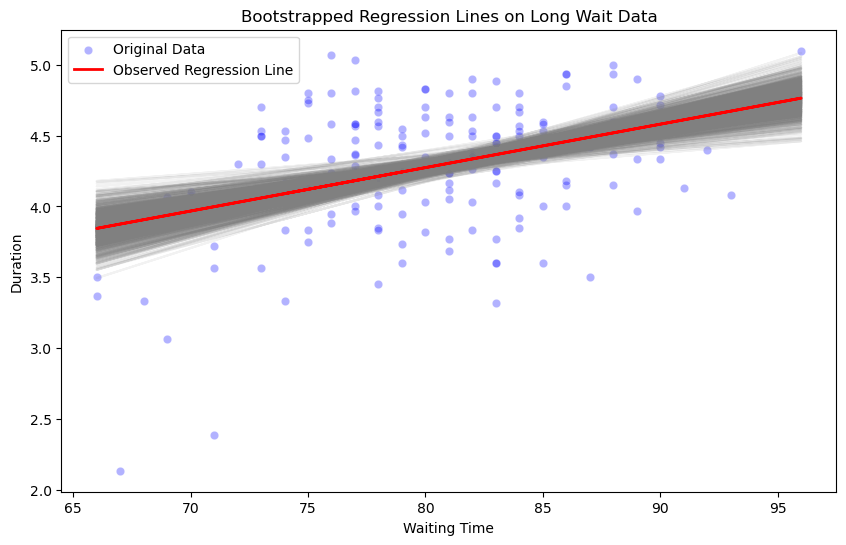

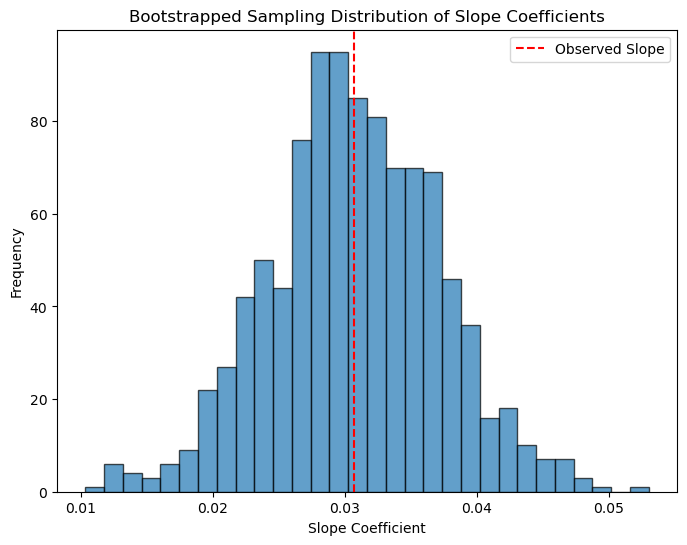

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Filter the original data for long wait times
long_wait_data = old_faithful[old_faithful['waiting'] > 65]

# Initialize lists to store bootstrapped slope coefficients and intercepts
bootstrapped_slopes = []
bootstrapped_intercepts = []

# Number of bootstraps
num_bootstraps = 1000

# Perform bootstrapping
for _ in range(num_bootstraps):
    # Sample with replacement from the long wait data
    bootstrap_sample = long_wait_data.sample(frac=1, replace=True)

    # Fit a linear regression model to the bootstrap sample
    X_bootstrap = sm.add_constant(bootstrap_sample['waiting'])
    y_bootstrap = bootstrap_sample['duration']
    model_bootstrap = sm.OLS(y_bootstrap, X_bootstrap).fit()

    # Store the slope and intercept
    bootstrapped_slopes.append(model_bootstrap.params['waiting'])
    bootstrapped_intercepts.append(model_bootstrap.params['const'])

# Plot the original scatter plot with overlaid bootstrapped regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(data=long_wait_data, x='waiting', y='duration', color='blue', alpha=0.3, label="Original Data")

# Overlay bootstrapped regression lines
for slope, intercept in zip(bootstrapped_slopes, bootstrapped_intercepts):
    plt.plot(long_wait_data['waiting'], intercept + slope * long_wait_data['waiting'], color='grey', alpha=0.1)

# Fit the observed regression line on original data for comparison
observed_model = sm.OLS(long_wait_data['duration'], sm.add_constant(long_wait_data['waiting'])).fit()
observed_intercept, observed_slope = observed_model.params['const'], observed_model.params['waiting']
plt.plot(long_wait_data['waiting'], observed_intercept + observed_slope * long_wait_data['waiting'], color='red', label="Observed Regression Line", linewidth=2)

plt.xlabel('Waiting Time')
plt.ylabel('Duration')
plt.title('Bootstrapped Regression Lines on Long Wait Data')
plt.legend()
plt.show()

# Plot the distribution of the bootstrapped slope coefficients
plt.figure(figsize=(8, 6))
plt.hist(bootstrapped_slopes, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_slope, color='red', linestyle='--', label="Observed Slope")
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.legend()
plt.show()


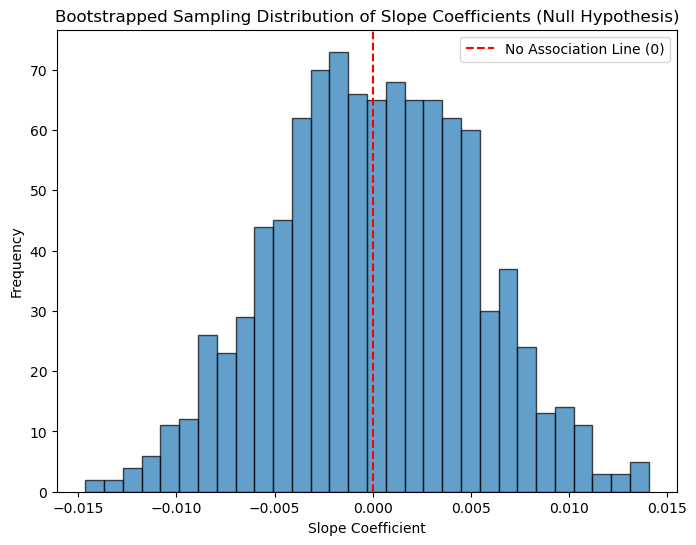

95% Bootstrapped Confidence Interval for Slope: [-0.0097, 0.0099]
Does the 95% bootstrapped confidence interval contain zero? True
Observed p-value for the slope from original data: 0.0000


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Filter the original data for long wait times
long_wait_data = old_faithful[old_faithful['waiting'] > 65]
sample_size = 160
num_bootstraps = 1000

# Define parameters for null hypothesis simulation
beta_0 = 1.65
beta_1 = 0
sigma = 0.37

# Initialize list to store simulated slope coefficients
bootstrapped_slopes = []

# Bootstrapping under the null hypothesis of no linear association
for _ in range(num_bootstraps):
    # Randomly sample 160 values of 'waiting' from long_wait_data for each bootstrap
    sampled_waiting = np.random.choice(long_wait_data['waiting'].values, size=sample_size, replace=True)
    
    # Generate simulated Y values using the null hypothesis model
    simulated_y = beta_0 + beta_1 * sampled_waiting + np.random.normal(0, sigma, size=sample_size)
    bootstrap_sample = pd.DataFrame({'waiting': sampled_waiting, 'duration': simulated_y})
    
    # Fit a linear regression to the simulated sample
    X_bootstrap = sm.add_constant(bootstrap_sample['waiting'])
    y_bootstrap = bootstrap_sample['duration']
    model_bootstrap = sm.OLS(y_bootstrap, X_bootstrap).fit()
    
    # Store the slope coefficient
    bootstrapped_slopes.append(model_bootstrap.params['waiting'])

# Plot the distribution of the bootstrapped slope coefficients
plt.figure(figsize=(8, 6))
plt.hist(bootstrapped_slopes, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label="No Association Line (0)")
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients (Null Hypothesis)')
plt.legend()
plt.show()

# Calculate the 95% confidence interval for the slope coefficients
lower_bound = np.percentile(bootstrapped_slopes, 2.5)
upper_bound = np.percentile(bootstrapped_slopes, 97.5)
print(f"95% Bootstrapped Confidence Interval for Slope: [{lower_bound:.4f}, {upper_bound:.4f}]")

# Report if zero is within the interval
contains_zero = lower_bound <= 0 <= upper_bound
print("Does the 95% bootstrapped confidence interval contain zero?", contains_zero)

# Compare simulated p-value with the observed p-value from the original model
observed_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
observed_slope_p_value = observed_model.pvalues['waiting']
print(f"Observed p-value for the slope from original data: {observed_slope_p_value:.4f}")


Certainly! Here’s a summary of our conversation:

1. **Question 10 Overview**: You needed guidance on simulating Simple Linear Regression models using bootstrapping with a null hypothesis of no linear association (slope \( \beta_1 = 0 \)) for the Old Faithful Geyser dataset.

2. **Initial Implementation**: We first created a bootstrapped sampling distribution of slope coefficients by repeatedly taking random samples (with replacement) of size 160 from the long-wait data, fitting linear regression models to each sample, and storing the resulting slope coefficients.

3. **Error Correction**: We encountered a broadcasting error because the original code tried to generate simulated \( Y \) values for a subset of 160 observations while using all 175 values of `waiting` from the long-wait dataset. We fixed this by ensuring each bootstrap sample drew a random subset of 160 values from `waiting`, matching the specified sample size.

4. **Final Code and Analysis**:
   - The corrected code generates simulated \( Y \) values under the null hypothesis (no linear association) by setting \( \beta_1 = 0 \), using the values of `waiting` for bootstrapped samples of size 160, and applying random noise with \( \sigma = 0.37 \).
   - We plotted the distribution of bootstrapped slope coefficients, calculated a 95% confidence interval, and checked if it contained zero (indicating no association).
   - We also compared the observed p-value from the original data’s regression to determine if it aligned with the results of the bootstrapped sampling distribution.

Let me know if you need additional clarification!

link: https://chatgpt.com/share/672c34e8-a7b4-800b-94cd-b842feb59910

### Q11. 
Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>

In [13]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


By altering the value under 68 min to short as 0 and over to be allowed us to visualise and compare the mean eruption durations between them. in the model, $\beta_{intercept}$ represents the mean eruption duration for the "short" group, and $\beta_{contrast}$ represents the difference in mean durations between "long" and "short" waits. The null hypothesis is that there is no difference in eruption duration between the two groups $ \beta_{contrast}$ = 0.

the difference between this model and previous models, where waiting time was treated as a continuous variable, is that the new model focuses on categorical distinctions. the previous models looked at how the waiting time changes affect eruption duration, the box plot focused on whether a specific threshold (68 minutes) creates a  difference in eruption duration. 

For hypothesis testing, the p-value for $\beta_{contrast}$ provides evidence against the null hypothesis. A small p-value (e.g., < 0.001) indicates a statistically significant difference in eruption duration between the "short" and "long" wait groups. This model offers a clearer interpretation by isolating the effect of crossing a specific wait time threshold, which makes the results easier to understand and apply compared to a continuous approach.
In conclusion, the indicator variable model simplifies the analysis by focusing on categorical differences, making it more interpretable when examining the impact of crossing a specific wait time threshold (68 minutes) on eruption duration.

Certainly! Here’s a summary of our approach to question 11:

1. **Objective**: We’re examining the relationship between geyser eruption duration and categorized wait times ("short" <68 minutes, "long" ≥68 minutes). Instead of treating `waiting` as a continuous variable, we use an indicator variable (`kind`) to distinguish between short and long waits.

2. **Model Setup**:
   - We specify a Simple Linear Regression model with an indicator variable for wait time type:
     \[
     Y_i = \beta_{\text{intercept}} + 1[\text{"long"}](k_i) \beta_{\text{contrast}} + \epsilon_i
     \]
   - Here, \( \beta_{\text{intercept}} \) represents the average `duration` for "short" waits, and \( \beta_{\text{contrast}} \) measures the additional duration for "long" waits compared to "short."

3. **Hypothesis Test**:
   - The null hypothesis states that there is **no difference** in average `duration` between "short" and "long" waits (\( \beta_{\text{contrast}} = 0 \)).
   - Based on the model output, we examine the p-value associated with \( \beta_{\text{contrast}} \). If the p-value is very small (e.g., < 0.001), it provides strong evidence that eruption duration significantly differs between short and long waits.

4. **Comparison with Previous Models**:
   - Previous models examined `waiting` as a continuous predictor, assuming a direct linear relationship with `duration`. 
   - In contrast, this indicator model simplifies the interpretation by focusing on the categorical effect of short vs. long waits, which can offer more actionable insights into how crossing a specific wait threshold impacts eruption duration.

5. **Conclusion**:
   - By interpreting the model’s results, we conclude whether there is a statistically significant difference in average eruption durations for short vs. long waits, based on the evidence against the null hypothesis. 

This approach highlights a more categorical perspective, enabling us to clearly interpret the impact of wait type on eruption duration.

### Q12.
Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The left-skewed and right-skewed histograms for the short and long wait times suggest that the residuals for each subset of data deviate from a symmetric, bell-shaped distribution. Since normality implies a symmetric distribution around zero, both left and right skewed histograms indicate that the residuals do not meet the normality assumption. Skewness in residuals often implies that either the linearity assumption might not hold or that the model doesn’t capture some underlying structure, which leads to non-normal errors.
Slope Model Histogram (More Normally Distributed)

 If the histogram for the slope model (using waiting as a continuous predictor) shows a roughly bell-shaped, symmetric distribution, this suggests the residuals may approximate normality. The distribution should have minimal skewness and kurtosis (tail heaviness) close to that of a normal distribution. A more normally distributed histogram for the slope model implies that this model’s error terms likely satisfy the normality assumption. If the slope model’s residuals align closely with a normal distribution, it suggests the model captures the linear relationship between waiting time and duration well, resulting in residuals that behave as expected under the normal error assumption in Simple Linear Regression.
Indicator Model Histogram (Narrower)

If the histogram for the indicator model (separating short and long waits into categories) appears narrower, it suggests that the residuals have less variability. However, this does not necessarily imply normality—sometimes, a narrow distribution may simply reflect a constrained spread rather than the bell shape characteristic of normality. A narrow histogram for the indicator model could mean that the model isn’t capturing the full variability in the data, especially if it simplifies the relationship too much. If it lacks the symmetry or bell shape of a normal distribution, this histogram suggests that the indicator model’s residuals do not meet the normality assumption as well as the slope model’s residuals.
Choosing the Most Plausible Model for Normally Distributed Error Terms
Based on these observations:

The Slope Model would be the most plausible model that meets the assumption of normally distributed error terms, assuming its histogram shows a symmetric, bell-shaped distribution.
The Indicator Model may not meet the assumption if the histogram is narrow but not symmetrical or bell-shaped, as it implies that the indicator variable doesn’t fully capture the relationship between waiting time and duration.


### Q13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

(A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels

(B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    

 (a) Explain how the sampling approaches work for the two simulations.
 
 (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 11, explaining how they're similar and different

##### A.)
In a permutation test, we test whether the difference in means between the two groups is significant by randomly shuffling the group labels multiple times. This creates a sampling distribution of the mean difference under the null hypothesis that there’s no actual difference in group means. Here’s how it works:

Original Mean Difference: First, calculate the observed mean difference between the two groups (long - short).

Shuffling the Labels:

Shuffle the labels (short and long wait) to create a “null distribution” of mean differences.
For each shuffle, assign shuffled labels to each data point and calculate the mean difference between the shuffled groups.
Repeat for Multiple Shuffles: Repeat this shuffling and mean difference calculation (e.g., 10,000 times) to generate a distribution of mean differences under the null hypothesis.

Calculate p-value: Compare the observed mean difference to this null distribution. The p-value is the proportion of shuffled mean differences that are as extreme as or more extreme than the observed difference.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the observed difference in means between "short" and "long" groups
observed_difference = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Initialize an empty list to store differences from permutations
perm_differences = []

# Number of permutations
n_permutations = 10000

# Permutation loop
for _ in range(n_permutations):
    # Shuffle 'kind' labels to simulate the null hypothesis
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)
    
    # Calculate the difference in means for this shuffled arrangement
    perm_diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    
    # Append the permuted difference to the list
    perm_differences.append(perm_diff)

# Convert permutation differences to a numpy array for easier calculations
perm_differences = np.array(perm_differences)

# Calculate the p-value as the proportion of permuted differences at least as extreme as the observed difference
p_value = np.mean(np.abs(perm_differences) >= np.abs(observed_difference))

# Output results
print(f"Observed Difference in Means: {observed_difference}")
print(f"P-Value from Permutation Test: {p_value}")


Observed Difference in Means: 2.20360023255814
P-Value from Permutation Test: 0.0


##### B.)
A bootstrap approach generates a confidence interval for the difference in means by resampling with replacement within each group. This method estimates the distribution of mean differences based on the data itself without assuming a specific distribution.

Bootstrap Resampling: For each bootstrap iteration:

Resample (with replacement) within each group (short and long).
Calculate the mean difference for this resampled data.
Repeat for Many Resamples: Repeat the resampling process (e.g., 10,000 times) to build a distribution of mean differences.

Calculate Confidence Interval: Use the 2.5th and 97.5th percentiles of the bootstrap distribution as the lower and upper bounds of the 95% confidence interval.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the number of bootstrap iterations
num_bootstrap = 10000
boot_differences = []

# Perform bootstrap resampling
for _ in range(num_bootstrap):
    # Resample with replacement within each group
    bootstrap_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(frac=1, replace=True)).reset_index(drop=True)
    
    # Calculate the mean difference for the resampled data
    boot_diff = bootstrap_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    boot_differences.append(boot_diff)

# Calculate the 95% confidence interval
confidence_interval = np.quantile(boot_differences, [0.025, 0.975])

# Output the results
print("Bootstrap 95% Confidence Interval for the Difference in Means:", confidence_interval)


Bootstrap 95% Confidence Interval for the Difference in Means: [2.10140409 2.30153288]


##### a.)
The permutation test tests whether the observed difference in means is significant by generating a null distribution via random shuffling.
This approach assumes that if there’s no true difference between the groups, the label assignment is arbitrary.
The p-value tells us the probability of observing a mean difference as extreme as the actual difference, assuming the null hypothesis is true.

Bootstrapping estimates the sampling distribution of the mean difference by resampling within each group.
This method is non-parametric and relies on the data's inherent structure to approximate the variability of the mean difference.
The confidence interval provides a range within which we expect the true mean difference to fall 95% of the time.
Part D: Comparison with the Indicator Variable Model Approach
Similarity: Both the permutation and bootstrap approaches are non-parametric methods. They do not require strong assumptions about the distribution of the data, making them flexible in cases where normality is questionable.

##### b.)
The Indicator Variable Model is a parametric approach, assuming a linear relationship between the indicator variable and the outcome. This approach models each group mean separately but assumes homoscedasticity and normality of errors.
In contrast, the permutation test and bootstrap rely directly on resampling techniques rather than on assumptions about normality or error variance. They assess the difference in means based on observed data characteristics without fitting a specific linear model.


### Q 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

I review the wiki text book with notebook and used chatgpt.